# Aufgabe 2: Region Growing
Mit *Region Growing* wird eine Klasse von Verfahren bezeichnet, die ein Bild derart in zusammenhängende Regionen zerteilen, sodass jeder Bildpunkt zu genau einer Region gehört.
Gestartet wird dabei mit sogenannten *Seed-Punkten*, von denen aus für alle benachbarten Punkte überprüft wird, ob sie zum Startpunkt passen.
Dies wird iterativ so lange wiederholt, wie die Region noch wächst.

Als Homogenitätskriterium können komplexe Texturanalysen durchgeführt oder im einfachsten Fall Ähnlichkeiten von Grauwerten überprüft werden.
Als formales Homogenitätskriterium $h$ für Grauwerte $v$ wäre beispielsweise
\begin{align}
 h(v) = \begin{cases} 1, & |v-v_\text{seed}| < \theta \\ 0, & \text{sonst}\end{cases}
\end{align}
denkbar.
Dabei bezeichnet $\theta$ einen gegebenen Schwellwert und $v_\text{seed}$ den Grauwert des Startpunktes.
Um Startpunkte zu finden, kann man z.\,B. in der linken oberen Ecke des Bildes ein erstes Region Growing beginnen und dann sukzessive alle noch keiner Region zugewiesenen Punkte als neue Startpunkte verwenden. Prinzipiell sind aber natürlich auch ganz andere Initialisierungen möglich.

Implementieren Sie eine Python-Funktion, die mittels Region Growing ein gegebenes Grauwertbild in zusammenhängende Regionen teilt!
Erzeugen Sie dabei ein Ausgabebild, auf dem die Regionen entweder farblich kodiert sind oder die Regionen jeweils als homogene Gebiete mit dem mittleren Grauwert der Region dargestellt werden!


## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np
import math

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Hough.jpg'

## 1. Definition der Parameter
Für das Region Growing ist das **Homogenitätskriterium** $h$ essentiell. Definieren Sie $h$ als Funktion bzw. Lambda-Ausdruck, der von $v$ und $v_{\textrm{seed}}$ abhängt und durch den Schwellwert $\theta$ konfigurierbar ist. Liefern Sie `True` zurück, falls das Kriterium erfüllt ist und anderfalls `False`.

In [3]:
theta = 0.5
h = lambda v, vseed: abs(v-vseed)<theta

## 2. Laden des Bildes

<IPython.core.display.Javascript object>


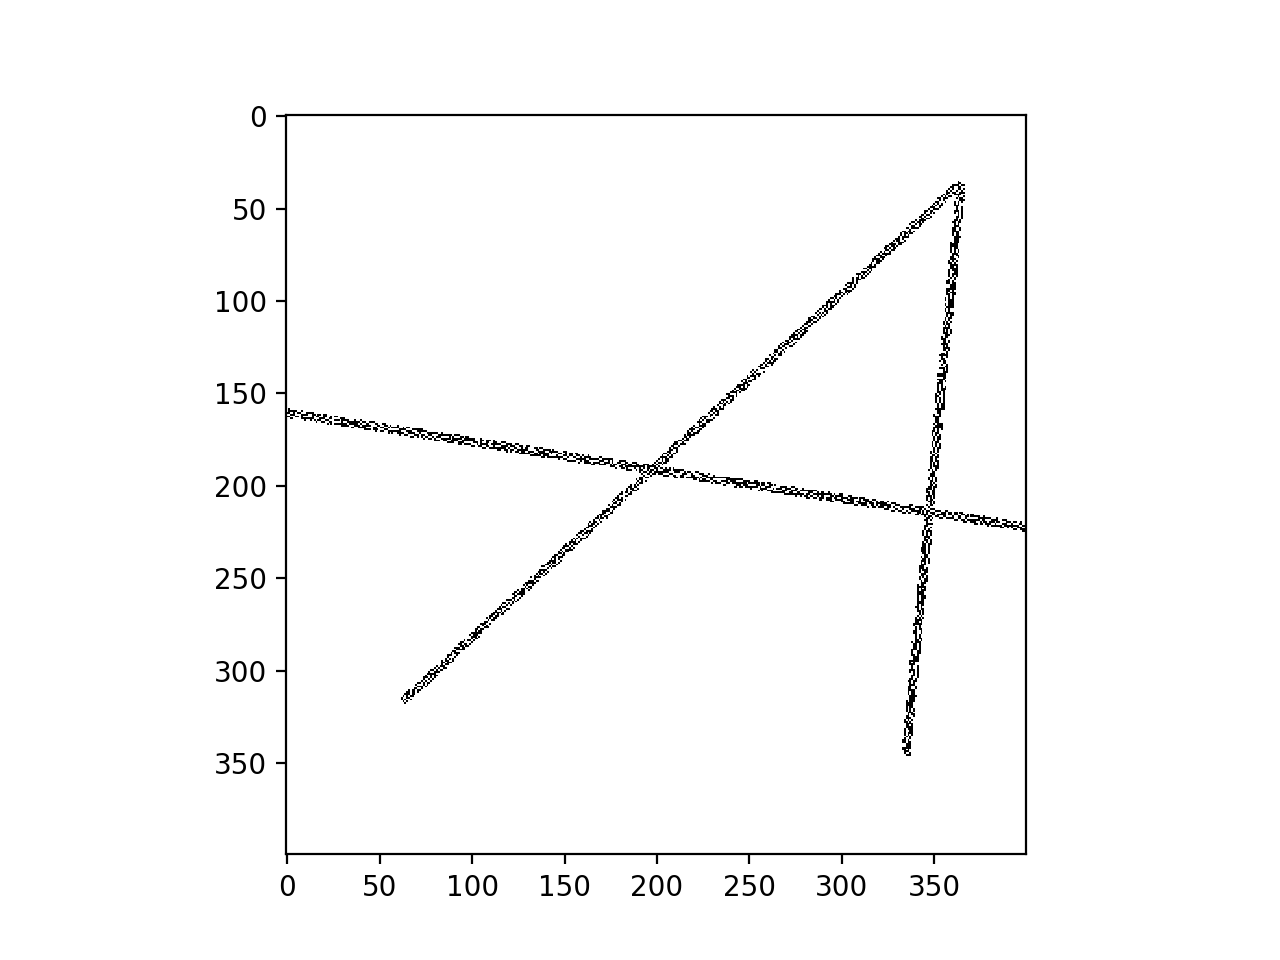

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

# import skimage.filters
# image = skimage.filters.sobel(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i][j] > 0.5: 
            image[i][j] =1

plt.imshow(image,plt.cm.gray)

## 3. Region Growing
Zunächst benötigen wir eine Hilfsfunktion `ex5_neighbors`, die uns zu einem bestimmten Bildpunkt bei bekannten Dimensionen des Bildes alle gültigen Indizes der unmittelbaren Nachbarbildpunkte liefert. Bedenken Sie die Bildränder!

In [5]:
def ex5_neighbors(point, image_shape):
    neighbors = []
    y, x = point

    ysize, xsize = image_shape
    maxx = xsize-1
    maxy = ysize-1

    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    neighbors.append((outx,outy))

    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    neighbors.append((outx,outy))
    
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    neighbors.append((outx,outy))

    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    neighbors.append((outx,outy))

    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    neighbors.append((outx,outy))

    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    neighbors.append((outx,outy))

    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    neighbors.append((outx,outy))

    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    neighbors.append((outx,outy))

    
    return set(neighbors)

Definieren Sie nun die Funktion `ex5_region_growing`, die die Aufgabe für ein bestimmtes Bild unter Verwendung des Homogenitätskriteriums $h$ löst. Dabei soll jedem Bildpunkt ein Regionenindex zugeordnet werden.

In [6]:
def ex5_region_growing(image, h, seeds):
    image_shape = image.shape
    output = np.zeros(shape = image_shape, dtype=np.int)
    
    seed_list = []
    seed_list.append(seeds)   
        
    while(len(seed_list)>0):
        current_seed = seed_list.pop(0)
        output[current_seed[0],current_seed[1]] = 1
        neighbors = [i for i in ex5_neighbors(current_seed, image_shape)]    
        
        for idx in neighbors:
            if h(image[idx[0],idx[1]],image[current_seed[0],current_seed[1]]) and output[idx[0],idx[1]]==0:
                output[idx[0],idx[1]] = 1
                seed_list.append(idx)
    
    return output

Nun wird die Region Growing-Funktion aufgerufen:

In [10]:
seeds = (200,200)
segmentation = ex5_region_growing(image, h, seeds)

In [8]:
seeds = (40,40)
            
image1 = np.zeros((100, 100)) 
idx = np.arange(25, 75)    
image1[idx[::-1], idx] = 255  
image1[idx, idx] = 255  

segmentation1 = ex5_region_growing(image1, h, seeds)

Visualisieren Sie das Ergebnis nun, indem Sie die Segmentierung neben dem Originalbild darstellen. Wählen Sie eine geeignete Color Map, um die Indizes zu visualisieren.

<IPython.core.display.Javascript object>


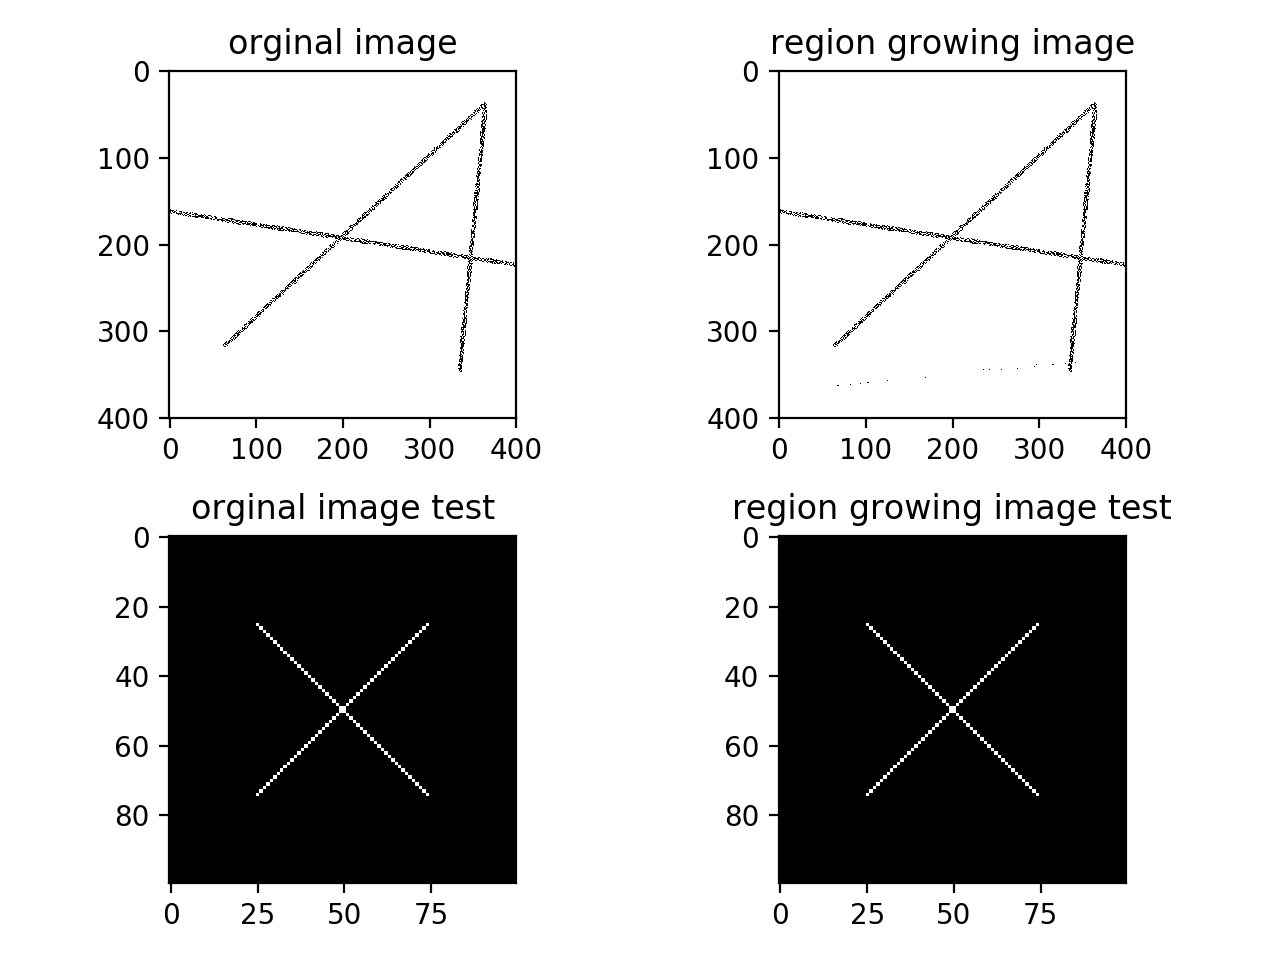

In [9]:
plt.figure('restored images')

plt.subplot(2,2,1)
plt.title('orginal image')
plt.imshow(image, cmap='gray')

# filtered image without noise
plt.subplot(2,2,2)
plt.title('region growing image')
plt.imshow(segmentation, cmap='gray')

# filtered image with noise
plt.subplot(2,2,3)
plt.title('orginal image test')
plt.imshow(image1, cmap='gray')

# noise spectrum
plt.subplot(2,2,4)
plt.title('region growing image test')
plt.imshow(segmentation1, cmap='gray')

plt.tight_layout()
plt.show()